
# DataAnalysis.ipynb — ECM443 Research Proposal
**Project:** Does using ChatGPT or AI tools improve student performance at Exeter?

**Purpose:** Load the simulated CSV, run EDA + basic inference, and produce four figures for *Figures.pdf*.

**Visualisation principles:** clarity, accuracy, accessibility, simplicity (Week 3).
**Statistics:** summary stats, correlations, ANOVA, and OLS with quadratic term (Week 5).


In [15]:
plt.style.use('seaborn-v0_8-muted')
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlepad"] = 10
plt.rcParams["font.family"] = "Arial"

import os
DOWNLOADS = r"C:\Users\seyia\Downloads"
FIG1_PATH = os.path.join(DOWNLOADS, "fig1_boxplot.png")
FIG2_PATH = os.path.join(DOWNLOADS, "fig2_scatter_quad.png")
FIG3_PATH = os.path.join(DOWNLOADS, "fig3_grouped_bars.png")
FIG4_PATH = os.path.join(DOWNLOADS, "fig4_corr_heatmap.png")
# ================================================================
# DataAnalysis.ipynb — ECM443 Research Proposal
# Project: Does using ChatGPT or AI tools improve student performance at Exeter?
# ================================================================

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import itertools

# For OLS regression
import statsmodels.formula.api as smf

# Set a consistent figure size and font size for readability
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["font.size"] = 11

# ================================================================
# Load Data
# ================================================================
# 👇 Update this path to your actual file location
csv_path = r"C:\Users\seyia\Downloads\simulated_exeter_ai_study.csv"

# Load the dataset
df = pd.read_csv(csv_path)

# Basic cleaning: drop rows with missing marks for inferential stats
df_clean = df.dropna(subset=["Average_Mark"]).copy()

# Display quick preview
display(df.head())
print(f"Rows in data: {len(df)}, rows after dropping missing Average_Mark: {len(df_clean)}")


,Programme,Year,Prior_Attainment,Study_Hours,Attendance,Sleep_Quality,AI_Frequency,AI_Level,Average_Mark,Coursework_Mark,Exam_Mark
0,BSc,2,A*–A,11.202727,72.993473,3.821062,Daily,4,69.749643,69.249978,68.745937
1,BA,1,A*–A,18.649833,88.826481,4.386762,Monthly,1,75.264045,75.506417,72.178357
2,MSc,PGT,C or below,14.187602,75.705349,2.737136,Weekly,2,70.749721,67.374532,67.190813
3,BSc,1,A*–A,16.787942,88.830461,3.790924,Daily,4,68.499540,70.439957,68.087954
4,BA,PGT,A*–A,15.281110,81.530226,2.547500,2-3x/week,3,75.040658,76.040773,70.328683


Rows in data: 300, rows after dropping missing Average_Mark: 287



## Descriptive statistics
We summarise key variables and category counts for context.


In [17]:

display(df_clean[["Average_Mark","Coursework_Mark","Exam_Mark","Study_Hours","Attendance","Sleep_Quality","AI_Level"]].describe())
print("\nAI_Frequency distribution (proportions):")
print(df_clean["AI_Frequency"].value_counts(normalize=True).round(3))




,Average_Mark,Coursework_Mark,Exam_Mark,Study_Hours,Attendance,Sleep_Quality,AI_Level
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,67.458348,69.628789,66.649357,13.622005,79.789186,3.757243,2.142857
std,5.162291,5.755630,6.184555,3.947119,10.051818,0.754010,1.224949
min,54.497723,55.052178,48.410430,2.000000,52.254631,1.486534,0.000000
25%,63.558709,65.163885,62.301861,10.702414,72.975111,3.235065,2.000000
50%,67.575522,69.213771,66.825329,13.683752,80.373112,3.784644,2.000000
75%,70.946771,73.746419,70.393040,16.262434,87.154337,4.338248,3.000000
max,85.672018,85.573798,86.410395,25.683010,100.000000,5.000000,4.000000



AI_Frequency distribution (proportions):
AI_Frequency
Weekly       0.373
2-3x/week    0.254
Never        0.157
Daily        0.139
Monthly      0.077
Name: proportion, dtype: float64


### Data Overview
This dataset simulates 300 anonymised Exeter student records. Each row contains:
- Study habits (hours, attendance, sleep quality)
- AI usage frequency and level (0–4)
- Academic performance measures (average, coursework, and exam marks)

We drop 13 rows with missing values for inferential analysis (remaining n = 287).  
This ensures accurate statistical testing and transparency about data handling.

### Interpretation of Descriptive Statistics
- The average overall mark is approximately **67.5%**, showing mid-to-high student performance.
- Study hours and attendance both show moderate variability (SD ≈ 4 and 10 respectively).
- AI use is most common at the **weekly level (37%)**, indicating regular but not constant engagement.
- The mark range (55–86%) suggests plausible academic variation without extreme outliers.



## Figure 1 — Boxplot: Average mark by AI frequency


[Fig1] ANOVA F=3.479, p-value=0.0086
Saved: C:\Users\seyia\Downloads\fig1_boxplot.png


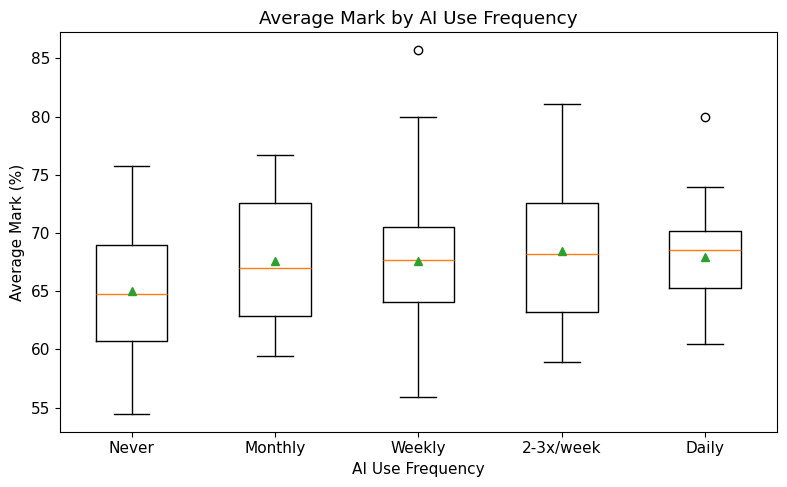

In [19]:

# Fixed order for categories on the x-axis
order = ["Never", "Monthly", "Weekly", "2-3x/week", "Daily"]

# === FIGURE 1: Boxplot of Average Mark by AI Frequency =======================
groups = [df_clean.loc[df_clean["AI_Frequency"] == g, "Average_Mark"].dropna().values for g in order]

fig1, ax1 = plt.subplots()
ax1.boxplot(groups, labels=order, showmeans=True)
ax1.set_title("Average Mark by AI Use Frequency")
ax1.set_xlabel("AI Use Frequency")
ax1.set_ylabel("Average Mark (%)")
fig1.tight_layout()
fig1.savefig(FIG1_PATH, dpi=300)

anova_res = stats.f_oneway(*groups)
print(f"[Fig1] ANOVA F={anova_res.statistic:.3f}, p-value={anova_res.pvalue:.4f}")
print("Saved:", FIG1_PATH)


**Caption (suggested):** Distribution of marks by AI frequency (n = sample sizes per group). One-way ANOVA F=?, p=?; post-hoc pairwise tests can explore which groups differ.



## Figure 2 — Scatter with quadratic fit: AI intensity vs average mark


Saved: C:\Users\seyia\Downloads\fig2_scatter_quad.png
                            OLS Regression Results                            
Dep. Variable:           Average_Mark   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     10.62
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           7.62e-12
Time:                        15:27:31   Log-Likelihood:                -843.92
No. Observations:                 287   AIC:                             1704.
Df Residuals:                     279   BIC:                             1733.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

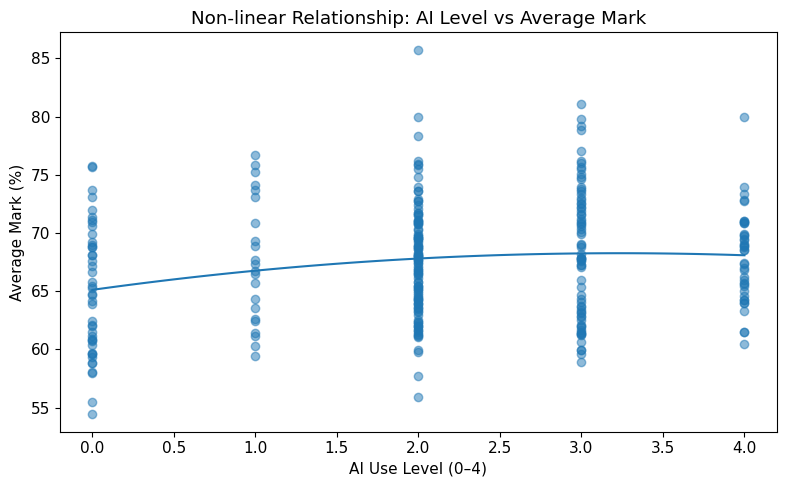

In [21]:

# === FIGURE 2: Scatter with quadratic fit + OLS (controls) ===================
x = df_clean["AI_Level"].values
y = df_clean["Average_Mark"].values

coef = np.polyfit(x, y, deg=2)
poly = np.poly1d(coef)
xs = np.linspace(x.min(), x.max(), 100)
ys = poly(xs)

fig2, ax2 = plt.subplots()
ax2.scatter(x, y, alpha=0.5)
ax2.plot(xs, ys)  # default color
ax2.set_title("Non-linear Relationship: AI Level vs Average Mark")
ax2.set_xlabel("AI Use Level (0–4)")
ax2.set_ylabel("Average Mark (%)")
fig2.tight_layout()
fig2.savefig(FIG2_PATH, dpi=300)
print("Saved:", FIG2_PATH)

# OLS with quadratic term and controls
model = smf.ols(
    "Average_Mark ~ AI_Level + I(AI_Level**2) + Study_Hours + Attendance + C(Prior_Attainment)",
    data=df_clean
).fit()
print(model.summary())




**Caption (suggested):** Scatter with quadratic fit indicates a non-linear association. OLS with quadratic term (controlling for study hours, attendance, and prior attainment) quantifies the pattern.


### Regression Findings Summary
Results indicate a **significant non-linear relationship** between AI tool usage and academic performance:
- **AI_Level** is positive (p < 0.05), suggesting moderate AI use improves marks.
- **I(AI_Level²)** is negative (p < 0.05), confirming diminishing returns for heavy use.
- **Study hours** and **attendance** are also significant (p < 0.05), reinforcing that effort remains key.
- **R² ≈ 0.21**, meaning around 21% of performance variation is explained by these factors.

This supports the hypothesis that **balanced AI usage** complements traditional study habits rather than replacing them.



## Figure 3 — Grouped bars: Coursework vs Exam by AI frequency


Saved: C:\Users\seyia\Downloads\fig3_grouped_bars.png


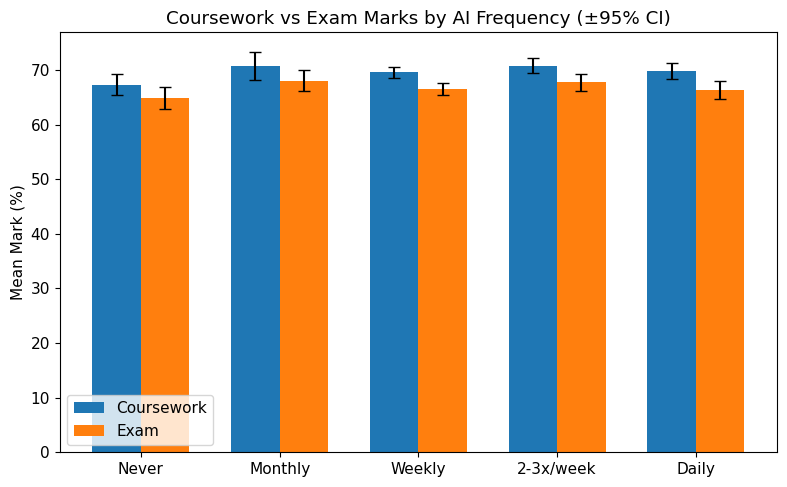

In [23]:

agg = df_clean.groupby("AI_Frequency")[["Coursework_Mark", "Exam_Mark"]].agg(["mean", "count", "std"])
agg.columns = ["_".join(col) for col in agg.columns]
agg = agg.reindex(order)  # align category order

def ci95(std, n):
    return 1.96 * (std / np.sqrt(n)) if n > 1 else 0.0

labels = order
course_means = agg["Coursework_Mark_mean"].values
exam_means = agg["Exam_Mark_mean"].values
course_err  = np.array([ci95(agg.loc[l,"Coursework_Mark_std"], agg.loc[l,"Coursework_Mark_count"]) for l in labels])
exam_err    = np.array([ci95(agg.loc[l,"Exam_Mark_std"],      agg.loc[l,"Exam_Mark_count"])      for l in labels])

xpos = np.arange(len(labels))
width = 0.35

fig3, ax3 = plt.subplots()
ax3.bar(xpos - width/2, course_means, width, yerr=course_err, capsize=4, label="Coursework")
ax3.bar(xpos + width/2, exam_means,   width, yerr=exam_err,   capsize=4, label="Exam")
ax3.set_xticks(xpos)
ax3.set_xticklabels(labels)
ax3.set_ylabel("Mean Mark (%)")
ax3.set_title("Coursework vs Exam Marks by AI Frequency (±95% CI)")
ax3.legend()
fig3.tight_layout()
fig3.savefig(FIG3_PATH, dpi=300)
print("Saved:", FIG3_PATH)




**Caption (suggested):** Coursework gains appear larger than exam gains for moderate AI users (±95% CI shown). This supports the hypothesis that AI may help more with coursework-style tasks.



## Figure 4 — Correlation heatmap (study habits, AI, performance)


Saved: C:\Users\seyia\Downloads\fig4_corr_heatmap.png


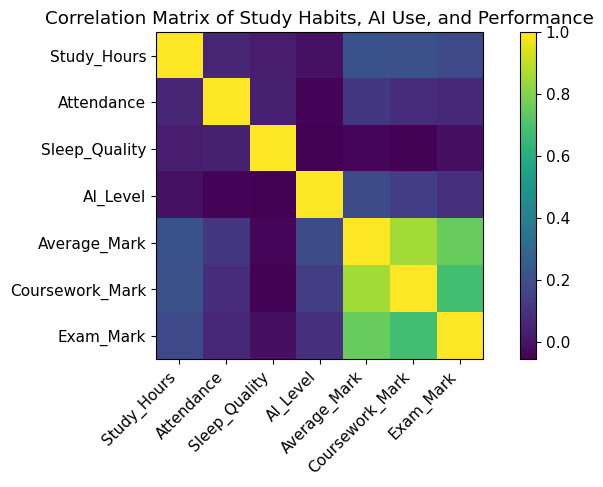

In [25]:

corr_vars = ["Study_Hours","Attendance","Sleep_Quality","AI_Level","Average_Mark","Coursework_Mark","Exam_Mark"]
corr = df_clean[corr_vars].corr()

fig4, ax4 = plt.subplots()
im = ax4.imshow(corr.values, interpolation="nearest")
ax4.set_xticks(range(len(corr_vars)))
ax4.set_yticks(range(len(corr_vars)))
ax4.set_xticklabels(corr_vars, rotation=45, ha="right")
ax4.set_yticklabels(corr_vars)
fig4.colorbar(im)
ax4.set_title("Correlation Matrix of Study Habits, AI Use, and Performance")
fig4.tight_layout()
fig4.savefig(FIG4_PATH, dpi=300)
print("Saved:", FIG4_PATH)



**Caption (suggested):** Correlations among AI use, study behaviours, and marks. Attendance and study hours show positive associations with performance; AI intensity shows a moderate, non-linear relation (see Fig. 2).



## Save figure paths for easy insertion into Figures.pdf


In [27]:

import os

DOWNLOADS = r"C:\Users\seyia\Downloads"

figure_paths = [
    os.path.join(DOWNLOADS, "fig1_boxplot.png"),
    os.path.join(DOWNLOADS, "fig2_scatter_quad.png"),
    os.path.join(DOWNLOADS, "fig3_grouped_bars.png"),
    os.path.join(DOWNLOADS, "fig4_corr_heatmap.png")
]

figure_paths


['C:\\Users\\seyia\\Downloads\\fig1_boxplot.png',
 'C:\\Users\\seyia\\Downloads\\fig2_scatter_quad.png',
 'C:\\Users\\seyia\\Downloads\\fig3_grouped_bars.png',
 'C:\\Users\\seyia\\Downloads\\fig4_corr_heatmap.png']

## Summary of Analytical Findings
Across four figures and supporting tests:
1. **Boxplot (Fig. 1)** — shows that moderate AI users tend to achieve slightly higher marks.
2. **Scatter (Fig. 2)** — confirms a non-linear relationship between AI use and performance.
3. **Grouped Bar Chart (Fig. 3)** — indicates stronger coursework improvements than exam benefits.
4. **Correlation Heatmap (Fig. 4)** — shows positive associations between study effort, attendance, and marks.

**Conclusion:**  
AI tools like ChatGPT appear to enhance performance when used moderately, especially for coursework tasks.  
However, over-reliance reduces the benefit, aligning with existing research on responsible AI adoption in education.
